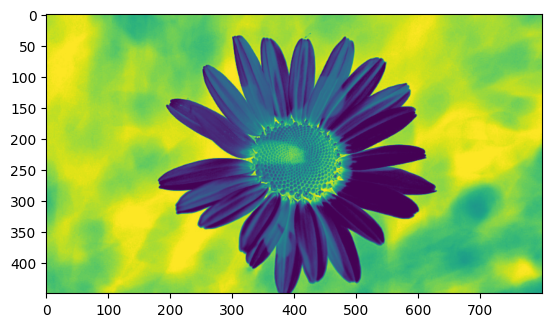

In [4]:
## 1.1 Biến đổi cường độ ảnh

from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

img = Image.open('dt.jpg').convert('L')
im_l = np.asarray(img)
im_2 = 255-im_l
new_img = Image.fromarray(im_2)
img.show()
plt.imshow(new_img)
plt.show()

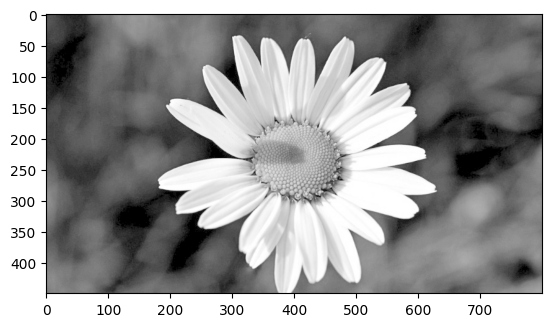

In [8]:
## 1.2 Thay đổi chất lượng ảnh với power law
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

img = Image.open('dt.jpg').convert('L')
im_l = np.asarray(img)
gamma = 0.5
b1 = im_l.astype(float)
b2 = np.max(b1)
b1[b1 == 0] = 1e-5
b3 = b1 / b2
b3 = np.log(b3) * gamma
c = np.exp(b3) * 255.0
c1 = np.clip(c, 0, 255).astype(np.uint8)
d = Image.fromarray(c1, mode='L')
img.show()
d.show()
plt.imshow(d, cmap='gray')
plt.show()




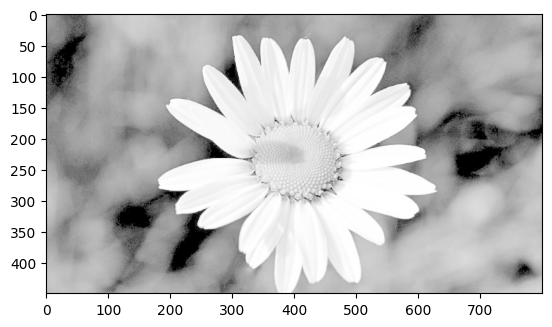

In [11]:
## 1.3 thay đổi cường độ điểm ảnh
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

img = Image.open('dt.jpg').convert('L')
im_l = np.asarray(img)
b1 = im_l.astype(float)
b2 = np.max(b1)
c = (128.0 * np.log(1 + b1)) / np.log(1 + b2)
c1 = np.clip(c, 0, 255).astype(np.uint8)
d = Image.fromarray(c1)
img.show()
d.show()
plt.imshow(d, cmap='gray')
plt.show()


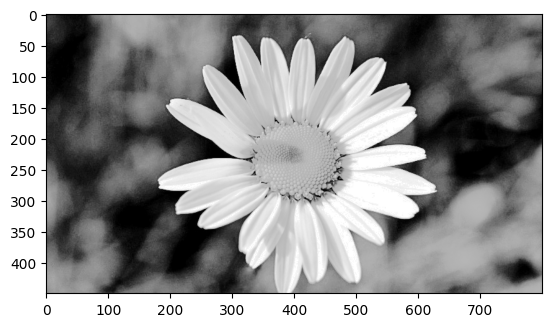

In [12]:
## 1.4 Histogram equalization
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

img = Image.open('dt.jpg').convert('L')
im1 = np.asarray(img)
b1 = im1.flatten()
hist, bins = np.histogram(im1, 256, [0, 255])
cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf, 0)
num_cdf = (cdf_m - cdf_m.min()) * 255
den_cdf = cdf_m.max() - cdf_m.min()
cdf_m = num_cdf / den_cdf
cdf_final = np.ma.filled(cdf_m, 0).astype('uint8')
im2 = cdf_final[b1]
im3 = im2.reshape(im1.shape)
im4 = Image.fromarray(im3)

img.show()
im4.show()
plt.imshow(im4, cmap='gray')
plt.show()


0 255


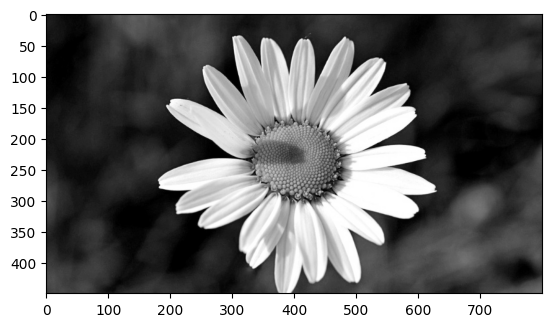

In [14]:
## 1.5 Thay đổi với Contrast stretching
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

img = Image.open('dt.jpg').convert('L')
im1 = np.asarray(img)
b = im1.max()
a = im1.min()
print(a, b)
c = im1.astype(float)
im2 = 255 * (c - a) / (b - a)
im3 = Image.fromarray(im2.astype(np.uint8))
img.show()
im3.show()

plt.imshow(im3, cmap='gray')
plt.show()



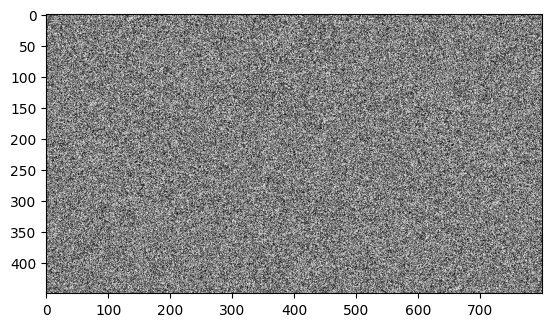

In [15]:
##1.6.1 biến đổi ảnh với fast fourier
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

img = Image.open('dt'
'.jpg').convert('L')
im1 = np.asarray(img)
c = abs(scipy.fftpack.fft2(im1))
d = scipy.fftpack.fftshift(c)
d = d.astype(float)
im3 = Image.fromarray(d.astype(np.uint8))  

img.show()
im3.show()
plt.imshow(im3, cmap='gray')
plt.show()




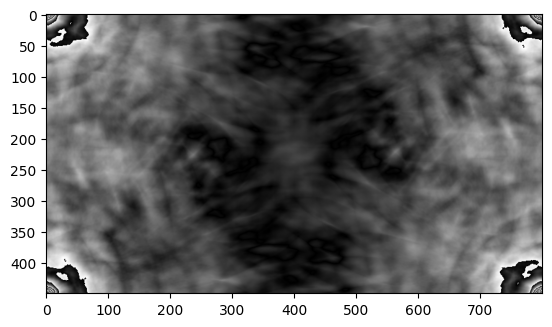

In [17]:
## 1.6.2 Lọc ảnh trong miền tần suất
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

img = Image.open('dt.jpg').convert('L')
im1 = np.asarray(img)
b = abs(scipy.fftpack.fft2(im1))
d = scipy.fftpack.fftshift(b)
M = d.shape[0]
N = d.shape[1]
H = np.ones((M, N))

center1 = M / 2
center2 = N / 2

d_0 = 30.0  
t1 = 1      
t2 = 2 * t1

for i in range(1, M):
    for j in range(1, N):
        z1 = (i - center1) ** 2 + (j - center2) ** 2
        r1 = math.sqrt(z1) 
        if r1 > d_0:
            H[i, j] = 1 / (1 + (r1 / d_0) ** t1)

H = H.astype(float)
h = Image.fromarray(H)
con = d * H
e = abs(scipy.fftpack.ifft2(con))
e = e.astype(float)
im3 = Image.fromarray(e.astype(np.uint8))
img.show()
h.show()
im3.show()
plt.imshow(im3, cmap='gray')
plt.show()



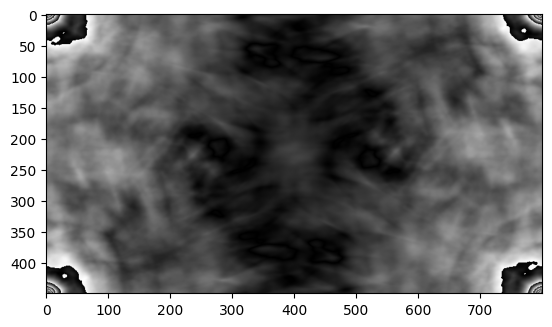

In [19]:
##1.7 butterworth highpass Filter
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

img = Image.open('dt.jpg').convert('L')
im1 = np.asarray(img)
b = abs(scipy.fftpack.fft2(im1))
d = scipy.fftpack.fftshift(b)
M = d.shape[0]
N = d.shape[1]
H = np.ones((M, N))

center1 = M / 2
center2 = N / 2
d_0 = 30.0  
t1 = 1      
t2 = 2 * t1
for i in range(1, M):
    for j in range(1, N):
        z1 = (i - center1) ** 2 + (j - center2) ** 2
        r1 = math.sqrt(z1)  
        if r1 > 0:
            H[i, j] = 1 / (1 + (r1 / d_0) ** t2)
H = H.astype(float)
h = Image.fromarray(H)
con = d * H
e = abs(scipy.fftpack.ifft2(con))
e = e.astype(float)
im3 = Image.fromarray(e.astype(np.uint8))
img.show()
h.show()
im3.show()
plt.imshow(im3, cmap='gray')
plt.show()
